# Bayes Course Pre-Work

As a first step, import some of the libraries we will be using in the course. This will test that everything is installed correctly on your system. Running the cell below should not return errors.

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd
import pymc as pm
import sklearn as sk
import seaborn as sns
import aesara.tensor as at
import aesara

print('All packages imported successfully!')

All packages imported successfully!


If everything was imported, you are ready to work through the exercises below.

## Data Import and Manipulation

Loading and processing data has become easier since the development of the `pandas` library, which provides data structures and functions for automating key data operations. 

For importing data from most common storage formats, several `read_*` functions are available.

In [ ]:
[f for f in dir(pd) if f.startswith('read_')]

The `../data/` subdirectory includes some clinical trial data in `cdystonia.csv`. Choose the appropriate function and use it to import this data to a variable called `cdystonia`. Print the first 15 lines of the resulting `DataFrame`.

In [ ]:
# Your answer here

This dataset is from [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

Patients were randomized to placebo (N=36), 5000 units of BotB (N=36), or 10,000 units of BotB (N=37). The response variable is the total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment). TWSTRS was measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began, so this is a longitudinal study.

1. Since there are repeated measures of each patient, the `patient` column alone cannot be used as an index, because it is not unique. Use some of the columns in the DataFrame to create an index for the data that is unique.

In [ ]:
# Your answer here

2. The `cdystonia` dataset is stored in **long** format, meaning that each row contains a single observation. Use pandas functions and methods to change the data to **wide** format, where each row represents the data for a single patient. 

In [ ]:
# Your answer here

3. To get an idea about the efficacy of the treatment, use `pandas` to group the data by treatment group, and calculate the mean and standard deviation of the `twstrs` outcome variable for each group in week 4.

In [ ]:
# Your answer here
# As a sanity check, this should be the answer:

#                mean       std
# treat
# 10000U         34.805556  12.188565
# 5000U          37.114286  15.311993
# Placebo        39.342857  11.827045

4. Since this is a longitudinal study, graphics are helpful for understanding the dynamics of the experiment. Using the plotting package of your choice (there are many for Python!) create a set of plots showing how the response variable changes over time for each experimental group. 

In [ ]:
# Your answer here

## Linear Algebra


Operations become much faster when we can express them as vectorized linear algebra commands. One example is generating multivariate normal distributions.

Suppose we wish to generate samples with mean $\mu$ and covariance $\Sigma$, where $\mu$ is $n \times 1$ and $\Sigma$ is $n \times n$. One way to do this is to calculate a [*Cholesky decomposition*](https://en.wikipedia.org/wiki/Cholesky_decomposition) of $\Sigma$, so that
$$
\Sigma = LL^T.
$$

Then if $x$ is $n$ independent draws from a standard normal distribution, 
$$
\nu = Lx + \mu \sim \mathcal{N}(\mu, \Sigma)
$$

### Exercises
Let $\mu = (3, 2)$, and
$$
\Sigma = \left(\begin{array}{cc}
1 & 0.9 \\
0.9 & 1
\end{array}\right)
$$

1. Use `np.linalg.cholesky` to compute $L$, the Cholesky decomposition of $\Sigma$
2. In newer Python (3.6+), `@` is matrix multiplication. Confirm that $\Sigma = LL^T$.
3. Draw 2 independent draws from a standard normal using `x = np.random.randn(2)`, and compute $\nu$ using `L @ x + mu`
4. The above exercise generates 1 draw from a multivariate normal. Use `x = np.random.randn(2, 1_000)` and the same formula as above to generate 1,000 draws.

In [ ]:
mu = np.array([[3], [2]])
sigma = np.array([[1, 0.9], [0.9, 1]])

In [ ]:
# Use `np.linalg.cholesky` to compute $L$, the Cholesky decomposition of `sigma`

In [ ]:
# In newer Python (3.7+), `@` is matrix multiplication. Confirm that `sigma = L @ L.T`

In [ ]:
# Draw 2 independent draws from a standard normal using `x = np.random.randn(2)`, and compute `nu` using `L @ x + mu`

In [ ]:
# The above exercise generates 1 draw from a multivariate normal. Use `x = np.random.randn(2, 1_000)` and the same formula as above to generate 1,000 draws

## Probability Distributions and Simulation

Bayesian inference relies on the use of probability distributions for constructing models. Though several statistical and machine learning packages implement their own set of probability distributions, the NumPy and SciPy libraries include general-purpose functions and classes for performing probability operations. 

NumPy has an efficient set of random number generators for different distributions, while SciPy implements a large set of complete probability distributions that allow them to be used in most applications.

In [ ]:
from scipy.stats import distributions as dists

In [ ]:
dir(dists)[-20:]

Let's look at a gamma distribution as an example:

In [ ]:
gamma_dist = dists.gamma

Inspecting the attributes of `gamma_dist`, we can see several important methods, including `pdf` (probability distribution function), `cdf` (cumulative distribution function), `rvs` (random number generator), and more.

In [ ]:
[f for f in dir(gamma_dist) if not f.startswith('_')]

### Exercise: Simulating linear regression

1. Generate a (1000, 10) `features` array using a uniform distribution.
2. Generate a (10, 1) `weights` array, using a normal distribution with standard deviation 2 and mean 0. Note this is typically unobserved.
3. Generate a (1000, 1) `noise` array, using a normal distribution with standard deviation 1 and mean 0. Note that this is typically unobserved.
4. Compute (1000, 1) `target` array, as `features @ weights + noise`
5. Recover an estimate for the weights using `np.linalg.pinv(features) @ target` (`pinv` is the [Moore-Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse))
6. Our statistical model is 
$$
\text{weights} \sim \mathcal{N}(0, 2) \\
\text{target} | \text{features}, \text{weights} \sim \mathcal{N}(\text{features} \cdot \text{weights}, 1)
$$
What is the log probability that all the weights are 0, and all the targets are 1, given your generated `features`?
7. What is the log probability of your generated `weights` and generated `targets`, given your generated `features`?

In [ ]:
# Generate a (1000, 10) `features` array using a uniform distribution.

# assert features.shape == (1000, 10)

In [ ]:
# Generate a (10, 1) `weights` array, using a normal distribution with standard deviation 2 and mean 0

# assert weights.shape == (10, 1)

In [ ]:
# Generate a (1000, 1) `noise` array, using a normal distribution with standard deviation 1 and mean 0

# assert noise.shape == (1000, 1)

In [ ]:
# Compute (1000, 1) `target` array, as `features @ weights + noise`

# assert target.shape == (1000, 1)

In [ ]:
# Recover an estimate for the weights using `np.linalg.pinv(features) @ target`

In [ ]:
# Compute the log probability that all the weights are 0, and all the targets are 1, given your generated `features`

In [ ]:
# Compute the log probability of your generated `weights` and `targets`, given your generated `features`

Your answer to 5 above should match the answer `scikit-learn` provides:

In [ ]:
# from sklearn.linear_model import LinearRegression

# LinearRegression(fit_intercept=False).fit(features, target).coef_.T

## Optimization

Another way of running linear regression is via optimization. Suppose we want to minimize the sum of squares using scipy. We can do this using `scipy.optimize`.

In [ ]:
from scipy.optimize import fmin_bfgs

features = np.random.uniform(size=(1000, 10))
weights = np.random.normal(0, 2, size=(10, 1))
noise = np.random.normal(0, 1, size=(1000, 1))
target = (features @ weights + noise).flatten()


### Exercise

Find the weights with the least mean squared error using `fmin_bfgs`. It expects a function to minimize and an initial point.

1. The function to minimize should accept an argument `x`, and return `((features @ x - target) ** 2).mean()`
2. You can initialize with a vector of 10 zeros.

In [ ]:
# Write the function to minimize, and an initial point

def loss_function(x):
    pass

# initial_point = 

# assert initial_point.shape == (10,)

In [ ]:
# min_x = fmin_bfgs(loss_function, initial_point)
# min_x

This answer should match our solution using linear algebra, or using scikit-learn:

In [ ]:
np.linalg.pinv(features) @ target

In [ ]:
from sklearn.linear_model import LinearRegression

LinearRegression(fit_intercept=False).fit(features, target).coef_.T

## Aesara

Our primary tool for building Bayesian models in this course is PyMC, which relies on a third-party computational backend called Aesara for much of the heavy-lifting. Aesara is a fork of Theano, which was created to perform deep learning. Aesara (and hence, PyMC) uses some of its key features to implement modern sampling-based fitting methods. This section is a short introduction to Aesara to give you a little practice with some of its data structures and functions before we jump in and use PyMC.

### Performing operations on data structures

To get us started with Aesara and get a feel of what we're working with, 
let's make a simple function: multiply a scalar with a matrix, and add that to another matrix. Here is how you do
it:

#### Step 1 - Declaring Variables

In [3]:
c = at.dscalar('c')
x = at.dmatrix('x')
y = at.dmatrix('y')

In Aesara, all symbols must be typed. In particular, `at.dscalar`
is the type we assign to "0-dimensional arrays (`scalar`) of doubles
(`d`). 

In [7]:
c.type

TensorType(float64, ())

``dmatrix`` is the Type for matrices of doubles. Then we can use
our new function on 2D arrays.


In [5]:
x.type

TensorType(float64, (None, None))

In [6]:
at.dscalar

TensorType(float64, ())

Notice that we have created objects of the type `TensorVariable`. A **tensor** is a generalization of an array to (potentially) multiple dimensions. Thus, everything from a scalar to a 5-dimensional hyper-matrix can be accomodated with the same abstraction. All expressions defined in Theano are performed by associating tensors with operations and with one another.

### Step 2 - Symbolic Expressions

The second step is to multiply `c` with `x`, then add `y`, yielding another variable `z`:

In [8]:
z = c*x + y

You can use the `pp` function to *pretty-print* out the computation associated to *z*.


In [9]:
from aesara.printing import pp
print(pp(z))

((c * x) + y)


### Step 3 - Compiling a Function

The last step is to create a function taking `c`, `x` and `y` as inputs
and giving `z` as output:

In [10]:
f = aesara.function([c, x, y], z)

The first argument to `function()` is a list of Variables
that will be provided as inputs to the function. The second argument
is a single Variable *or* a list of Variables. For either case, the second
argument is what we want to see as output when we apply the function. *f* may
then be used like a normal Python function.


Now we can call the function:

In [11]:
C = 2
X = [[1, 2], [3, 4]]
Y = [[10, 20], [30, 40]]

f(C, X, Y)

array([[12., 24.],
       [36., 48.]])

If you are following along and typing into an interpreter, you may have
noticed that there was a slight delay in executing the ``function``
instruction. Behind the scenes, *f* was being **compiled into C code**.

Internally, Aesara builds a graph structure composed of interconnected `Variable` nodes, `op` nodes and `apply` nodes. 

An `op` node encapsulates a particular mathematical operation, such as an arithmetic operation or a transformation.

An `apply` node represents the application of an `op` to some variables. It is important to draw the difference between the definition of a computation represented by an `op` and its application to some actual data which is represented by the apply node. 

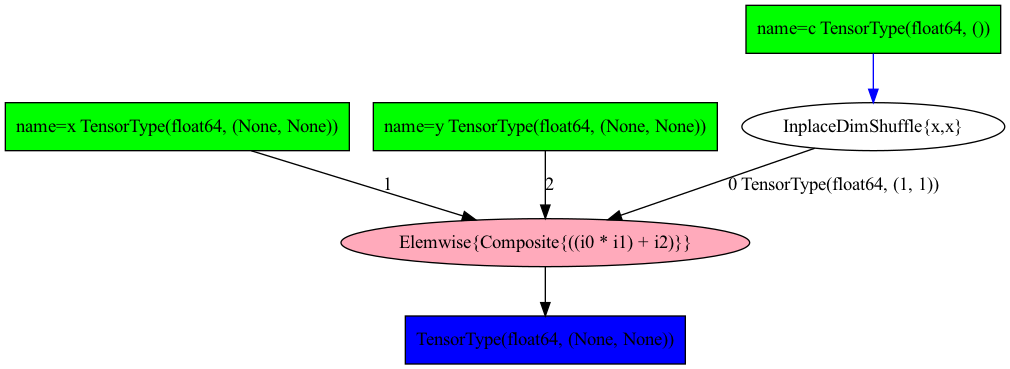

In [12]:
from IPython.display import Image

Image(aesara.printing.pydotprint(f, return_image=True))

A `Variable` is the main data structure you work with when
using Aesara. By calling `at.dscalar` or `at.dmatrix` with a string argument, you create a
`Variable` representing a floating-point scalar or matrix quantity with the
given name. If you provide no argument, the symbol will be unnamed. Names
are not required, but they can help debugging.

### Exercise

Let's create a (slightly) more interesting function: a logistic curve. The logistic transformation is:

$$\log\left[\frac{p}{1-p}\right] = x$$

Which transforms values on the $[0, 1]$i interval to the real line. Most often, we are doing the inverse of this, for example, when we build a logistic regression. The inverse of this function is:

$$p = \frac{1}{1 + \exp(-x)}$$

Implement this function in Aesara, compile it, and run it on one of the matrices created above.

In [ ]:
# Hint: most of Aesara's functions are in the aesara.tensor submodule (aliased as `at`).